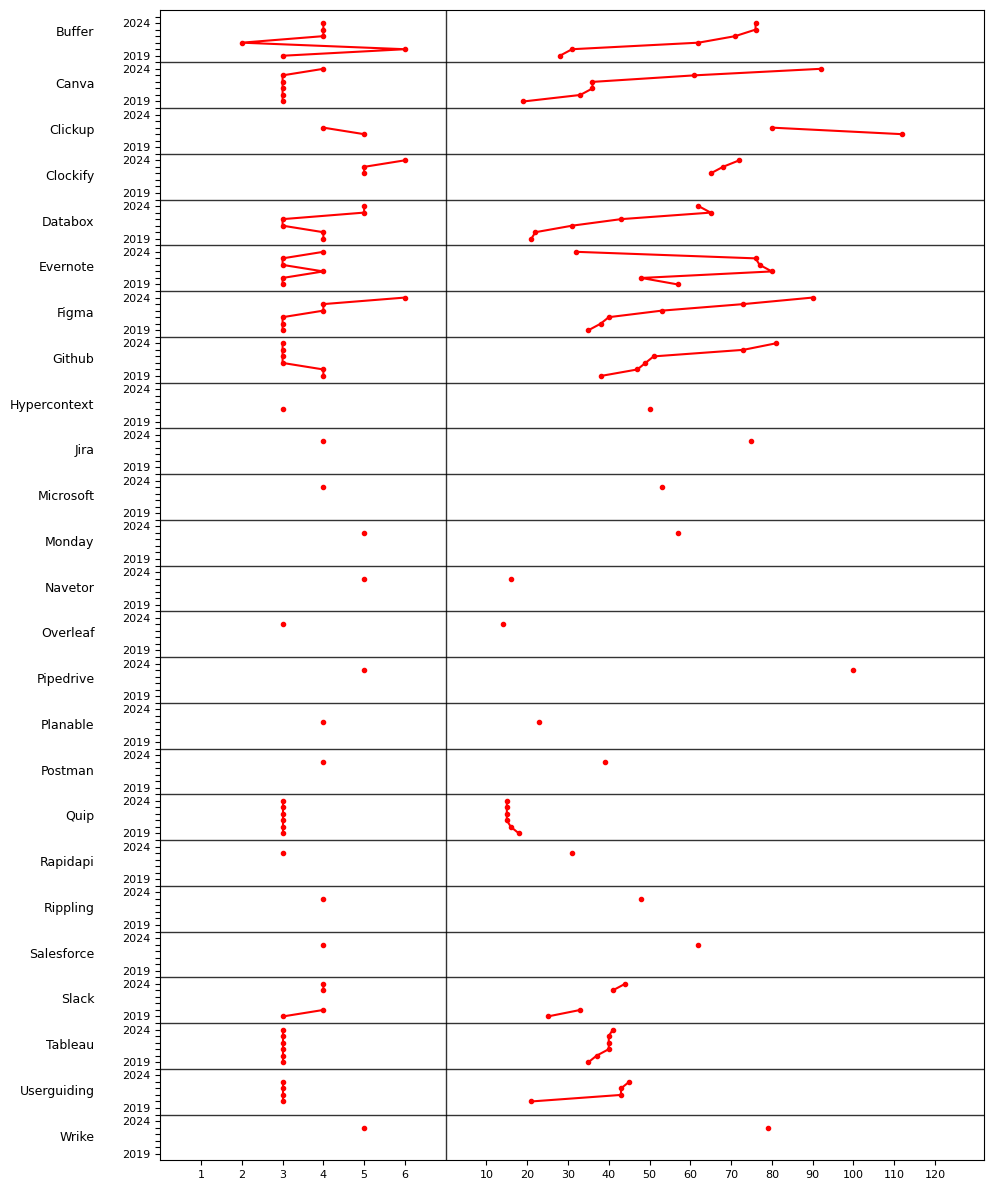

In [1]:
from dataset_generator import PricingsLoader
from matplotlib import pyplot as plt
from models import PricingManager

STUDIED_YEARS = ["2019", "2020", "2021", "2022", "2023", "2024"]
GROUP_SIZE = len(STUDIED_YEARS)+1
X_SEPARATION = 10
FIG_HEIGHT = 12

def get_data_from_dataset(dataset):
    data = {}
    max_plans = 0
    max_features = 0

    for i in range(len(dataset)):
        pricing: PricingManager = dataset[i]
        saas_index_name = pricing.saas_name.split(" ")[0].strip().lower().capitalize()
        if saas_index_name not in data:
            data[saas_index_name] = {year: None for year in STUDIED_YEARS}
        
        data[saas_index_name][str(pricing.year)] = {}
        data[saas_index_name][str(pricing.year)]["number_of_features"] = len(pricing.features)
        data[saas_index_name][str(pricing.year)]["number_of_plans"] = len(pricing.plans)

        if len(pricing.features) > max_features:
            max_features = len(pricing.features)
        
        if len(pricing.plans) > max_plans:
            max_plans = len(pricing.plans)

    data_items = sorted(data.items(), key=lambda x: x[0], reverse=True)
    data = dict(data_items)

    return data, max_plans, max_features

def format_data_for_visualization(data, max_plans):
    formatted_data = {}
    data_items = list(data.items())
    
    for i in range(len(data)):
        start_y_pos = i*GROUP_SIZE
        end_y_pos = start_y_pos + GROUP_SIZE - 1
        saas = data_items[i][0]
        saas_details = data_items[i][1]
        formatted_data[saas] = {'plans': {'x': [], 'y': []}, 'features': {'x': [], 'y': []}}

        for j in range(start_y_pos, end_y_pos):
            iter_index = j - start_y_pos
            year = STUDIED_YEARS[iter_index]
            year_data = saas_details[year]
            number_of_plans = None
            number_of_features = None

            if year_data is not None:
                number_of_plans = year_data['number_of_plans'] * 10
                number_of_features = year_data['number_of_features'] + max_plans*10 + X_SEPARATION

            formatted_data[saas]['plans']['x'].append(number_of_plans)
            formatted_data[saas]['features']['x'].append(number_of_features)
            formatted_data[saas]['plans']['y'].append(j)
            formatted_data[saas]['features']['y'].append(j)
    
    return formatted_data

def generate_figure(dataset):

    data, max_plans, max_features = get_data_from_dataset(dataset)

    formatted_data = format_data_for_visualization(data, max_plans)

    ds_size = len(data)

    # x_tags = [i for i in range(1, max_plans + 1)] + ["  "] + [i for i in range(1, max_features + 1)]
    y_tags = ([STUDIED_YEARS[0]] + ["  "]*(len(STUDIED_YEARS)-2) + [STUDIED_YEARS[-1]] + ["  "])*ds_size

    x_ticks = list(range(0, max_plans*10+1, 10))[1:] + list(range(max_plans*10+X_SEPARATION, max_plans*10+X_SEPARATION+max_features+11, 10))[1:]
    x_tags = [i for i in range(1, max_plans + 1)] + [i for i in range(10, max_features + 11, 10)]
    y_range = range(ds_size*7)

    fig, ax = plt.subplots(figsize=(10, FIG_HEIGHT))

    for _, values in formatted_data.items():
        ax.plot(values['plans']['x'], values['plans']['y'], marker='o', linestyle='-', color='r', markersize=3)
        ax.plot(values['features']['x'], values['features']['y'], marker='o', linestyle='-', color='r', markersize=3)
    
    ax.set_xticks(x_ticks, labels=x_tags)
    ax.set_yticks(y_range, labels=y_tags)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    
    yticks = ax.get_yticks()
    # Añadir etiquetas a grupos de 6 ticks
    for i in range(0, len(yticks), 7):
        # Asegurarse de que el índice no exceda el rango de yticks
        if i + 7 < len(yticks):
            group_label_position = (yticks[i] + yticks[i + 4]) / 2
        else:
            group_label_position = (yticks[i] + yticks[-1]) / 2
        
        separator_position = yticks[i-1]

        # Añadir la etiqueta del grupo
        ax.text(-0.08, group_label_position, list(formatted_data.keys())[i//7], transform=ax.get_yaxis_transform(),
                horizontalalignment='right', fontsize=9)
        
        if i > 0:  # No dibujar en el primer grupo
            ax.axhline(y=separator_position, color='black', linestyle='-', linewidth=1, alpha=0.8)

    ax.axvline(x=max_plans*10+X_SEPARATION, color='black', linestyle='-', linewidth=1, alpha=0.8)

    ax.set_xbound(0, max_features + max_plans*10 + X_SEPARATION + 20)
    ax.set_ybound(-1, ds_size*7)
    plt.tight_layout()
    plt.savefig('../../figures/pricings_evolution.png')
    plt.show()

dataset = PricingsLoader('../../pricings')
generate_figure(dataset)